In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as sc
import skimage.transform as sktr
import skimage.io as skio


In [2]:
# Initialize 100 random datapoints

np.random.seed(425)
points = np.random.rand(100, 2)
centers = None # Data is entirely random
rand_points = None # Points is already entirely random

In [3]:
# Initialize n Gaussian clusters

np.random.seed(1426)
n = 10
#centers = np.random.rand(n, 2) * scale # n origins of simulated disease
lats = np.random.rand(n) * 90
longs = np.random.rand(n) * 360 - 180
centers = np.append(lats[:, None], longs[:, None], axis=1)

points = None
for i in range(n):
    cluster_points = np.random.multivariate_normal(centers[i], np.identity(2) * 0.2, 50)
    if points is None:
        points = cluster_points
    else:
        points = np.append(points, cluster_points, axis=0)
        
#rand_points = None
rand_lats = np.random.rand(50) * 90
rand_longs = np.random.rand(50) * 360 - 180
rand_points = np.append(rand_lats[:, None], rand_longs[:, None], axis=1)
points = np.append(points, rand_points, axis=0)

points = np.pi * points / 180
centers = np.pi * centers / 180
rand_points = np.pi * rand_points / 180
np.random.shuffle(points)

In [4]:
# Generate CO Coordinates

np.random.seed(11427)
n = 10
#centers = np.random.rand(n, 2) * scale # n origins of simulated disease
lats = (np.random.rand(n)) * 4 + 37 # / 9.69527743036
longs = (np.random.rand(n)) * 7 - 109.050939 # / 6.15384615385
centers = np.append(lats[:, None], longs[:, None], axis=1)

points = None
for i in range(n):
    cluster_points = np.random.multivariate_normal(centers[i], np.identity(2) * 0.002, 25)
    if points is None:
        points = cluster_points
    else:
        points = np.append(points, cluster_points, axis=0)
        
#rand_points = None
rand_lats = (np.random.rand(25)) * 4 + 37
rand_longs = (np.random.rand(25)) * 7 - 109.050939
rand_points = np.append(rand_lats[:, None], rand_longs[:, None], axis=1)
points = np.append(points, rand_points, axis=0)

points = np.pi * points / 180
centers = np.pi * centers / 180
rand_points = np.pi * rand_points / 180
np.random.shuffle(points)

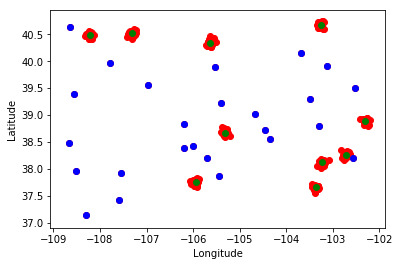

In [8]:
# Graph the datapoints

plt.scatter(points.T[1] * 180 / np.pi, points.T[0] * 180 / np.pi, c="red")
if centers is not None:
    plt.scatter(centers.T[1] * 180 / np.pi, centers.T[0] * 180 / np.pi, c="green")
if rand_points is not None:
    plt.scatter(rand_points.T[1] * 180 / np.pi, rand_points.T[0] * 180 / np.pi, c="blue")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [11]:
# Run DBSCAN on the points.

# ----Hyperparameters----

same_sample_max_dist = 0.005#2.08113883008 #0.07
min_cluster_size = 15
distance_metric = 'haversine'

# ----Hyperparameters----

classifier = sc.DBSCAN(eps=same_sample_max_dist, min_samples=min_cluster_size, metric=distance_metric)
clustering = classifier.fit(points)
print("Clustering Complete.")


Clustering Complete.


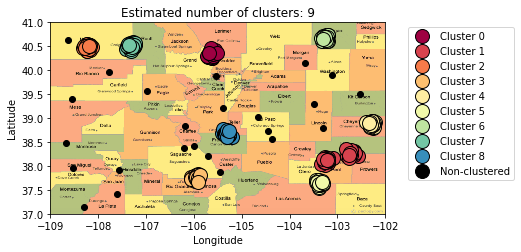

In [12]:
# Plot clusters
# Code adpoted from https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_
cluster_count = len(set(labels)) - (1 if -1 in labels else 0)

co_img = skio.imread("colorado.png")
#co_img = sktr.resize(co_img, (co_img.shape[0] // 255, co_img.shape[1] // 213))
plt.imshow(co_img, extent=[-109, -102, 37, 41])

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    if k == -1:
        class_label = "Non-clustered"
    else:
        class_label = "Cluster " + str(k)

    xy = points[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 1] * 180 / np.pi, xy[:, 0]  * 180 / np.pi, 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14, label=class_label)

    xy = points[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 1]  * 180 / np.pi, xy[:, 0]  * 180 / np.pi, 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % cluster_count)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 1))
plt.show()